In [8]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [9]:
# import Housing.csv
df = pd.read_csv('data/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [10]:
#Data preprocessing

df = df.replace(to_replace = "yes", value = 1)
df = df.replace(to_replace = "no", value = 0) 

df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


## Question 1

### Question 1 b: Model P

In [8]:
# Build a regression model with ‘guestroom’, ‘basement’ and ‘hotwaterheating’ as three predictor variables. 
# Let’s call this model ‘Model P’. 
# Compute and interpret MSE and R2 for this model. 
y=df["price"]
y = y.to_numpy().reshape(-1, 1)

x = df[['guestroom', 'basement', 'hotwaterheating']]
x = x.to_numpy().reshape(-1, 3)

#list to store number of predictor variables
predictors=[]
#list to store model scores
MSE_scores=[]
R2_scores=[]

#train model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

MSE = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)

print("Mean squared error: ", MSE)
print("R-squared: ", R2)

predictors.append(2)
MSE_scores.append(MSE)
R2_scores.append(R2)

Mean squared error:  3198421374343.8276
R-squared:  0.08410455906652425


This is not a very good model. The error is very large, and this R-squared value indicates that the model accounts for only 8.4% of the variation in the data.

### Question 1 c: Model Q

In [9]:
# Compare MSE and R2 of this model with the model with ‘area’ and ‘bedrooms’ as predictor variables. 
# Let’s call this model ‘Model Q’.
x1 = df[['area', 'bedrooms']]
x1 = x1.to_numpy().reshape(-1, 2)

#train model
model = LinearRegression()
model.fit(x1, y)
y_pred = model.predict(x1)

MSE = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)

print("Mean squared error: ", MSE)
print("R-squared: ", R2)

predictors.append(2)
MSE_scores.append(MSE)
R2_scores.append(R2)

Mean squared error:  2198317652852.9524
R-squared:  0.37049285246705077


This updated model has a higher predictive power than Model P did: the error is smaller, and the R-squared has improved. I would hesitate to call this a "good" model for our data, but it is *better*.

## Question 2

In [21]:
# import data
df = pd.read_csv('data/breast_cancer.csv')

# clean data
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [40]:
#Create two logistic regression models
#  ‘Diagnosis’ as a dependent variable and ‘radius_mean’ as an independent variable.
threshold = 0.5

def format_prediction(prediction):
    formatted = []
    for i in prediction:
        if i <= threshold:
            formatted.append(0)
        else:
            formatted.append(1) #NEXT: use this method!
    return formatted

y = df["diagnosis"]
y = y.to_numpy().reshape(-1, 1)

x1 = df[['radius_mean']]
x1 = x1.to_numpy().reshape(-1, 1)

model1 = LinearRegression()
model1.fit(x1, y)
y_pred1 = model1.predict(x1)
y_pred_formatted1 = format_prediction(y_pred1)


#  ‘Diagnosis’ as a dependent variable and ‘radius_mean’  and ‘perimeter_mean’ as two independent variables.
x2 = df[['radius_mean', 'perimeter_mean']]
x2 = x2.to_numpy().reshape(-1, 2)

model2 = LinearRegression()
model2.fit(x2, y)
y_pred2 = model2.predict(x2)
y_pred_formatted2 = format_prediction(y_pred2)

#### Question 2 a. 

Diagnosis by Radius mean:


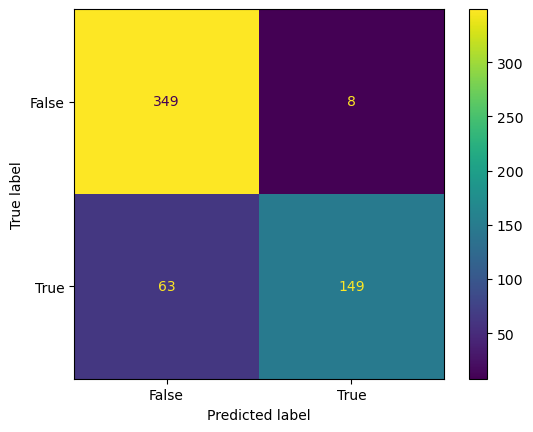

Diagnosis by Radius mean and Perimeter mean:


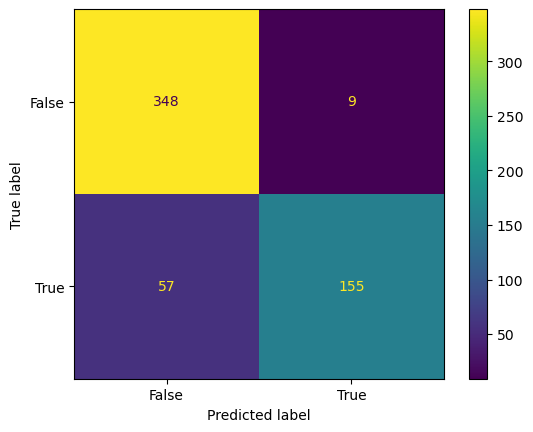

In [44]:
# Print confusion matrix for these two models.
# source: https://www.w3schools.com/python/python_ml_confusion_matrix.asp
from sklearn import metrics
import matplotlib.pyplot as plt

# model 1
print("Diagnosis by Radius mean:")
confusion_matrix = metrics.confusion_matrix(y, y_pred_formatted1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# model 2
print("Diagnosis by Radius mean and Perimeter mean:")
confusion_matrix = metrics.confusion_matrix(y, y_pred_formatted2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

#### Question 2 b.

In [45]:
# Calculate precision and recall for these two models plugging in the values from the confusion matrix in the precision and recall formulae.
# Precision = TP / (TP + FP)
precision = 155 / (155 + 9)
print("Precision: ", precision)

# Recall = TP / (TP + FN)
recall = 155 / (155 + 57)
print("Recall: ", recall)

Precision:  0.9451219512195121
Recall:  0.7311320754716981


#### Question 2 c.

In [ ]:
# Verify your results printing precision and recall using the library functions in the notebook.
